# Thêm các

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file catada.txt

In [4]:
data = pd.read_csv('cadata.txt', header=None, delim_whitespace=True, encoding='latin1')

# Đặt tên cho các cột theo mô tả từ dataset

In [5]:
column_names = [
    'Median House Value', 'Median Income', 'Housing Median Age', 
    'Total Rooms', 'Total Bedrooms', 'Population', 'Households', 
    'Latitude', 'Longitude'
]
data.columns = column_names
data.head()

,Median House Value,Median Income,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Latitude,Longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25


# Kiểm tra các giá trị null

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median House Value  20640 non-null  float64
 1   Median Income       20640 non-null  float64
 2   Housing Median Age  20640 non-null  float64
 3   Total Rooms         20640 non-null  float64
 4   Total Bedrooms      20640 non-null  float64
 5   Population          20640 non-null  float64
 6   Households          20640 non-null  float64
 7   Latitude            20640 non-null  float64
 8   Longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Dữ liệu đã cho không có giá trị null

# Chia dữ liệu thành tập train và test

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['Median House Value'], axis=1)
y = data['Median House Value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

In [10]:
train_data

,Median Income,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Latitude,Longitude,Median House Value
117,3.0897,52.0,4190.0,1105.0,1786.0,1037.0,37.83,-122.25,234100.0
644,6.9096,33.0,1996.0,268.0,686.0,270.0,37.73,-122.13,341800.0
16369,1.4274,22.0,2575.0,680.0,1367.0,645.0,38.01,-121.31,90500.0
13679,5.3366,4.0,4289.0,682.0,1981.0,705.0,34.04,-117.24,165100.0
15804,5.2519,50.0,2589.0,569.0,945.0,544.0,37.76,-122.44,376600.0
...,...,...,...,...,...,...,...,...,...
6410,3.8029,35.0,2454.0,458.0,1110.0,435.0,34.11,-118.02,414800.0
11111,3.5329,31.0,2043.0,468.0,1524.0,454.0,33.84,-117.90,187400.0
11381,3.6364,19.0,1028.0,191.0,340.0,159.0,33.68,-117.95,252800.0
16173,1.2387,42.0,4219.0,1125.0,3549.0,993.0,37.72,-122.42,212800.0


# Biểu đồ phân phối của các biến trong dữ liệu huấn luyện

array([[<Axes: title={'center': 'Median Income'}>,
        <Axes: title={'center': 'Housing Median Age'}>,
        <Axes: title={'center': 'Total Rooms'}>],
       [<Axes: title={'center': 'Total Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Median House Value'}>]], dtype=object)

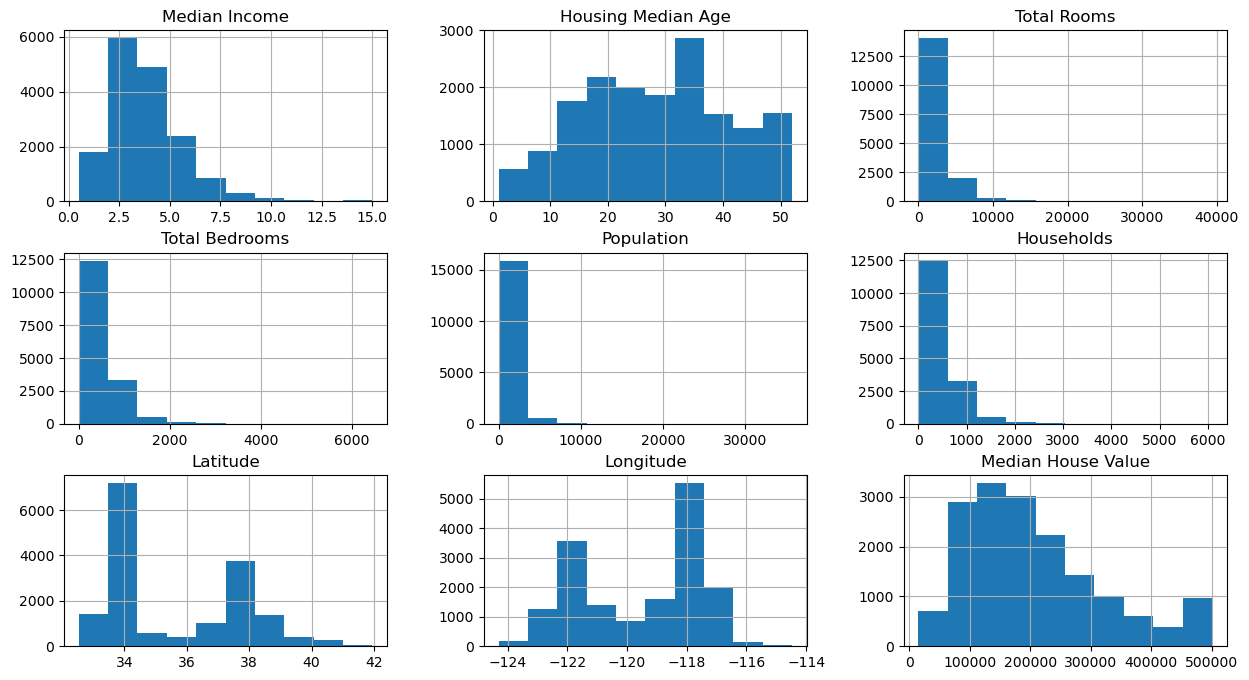

In [11]:
train_data.hist(figsize=(15, 8))

# Ma trận tương quan

<Axes: >

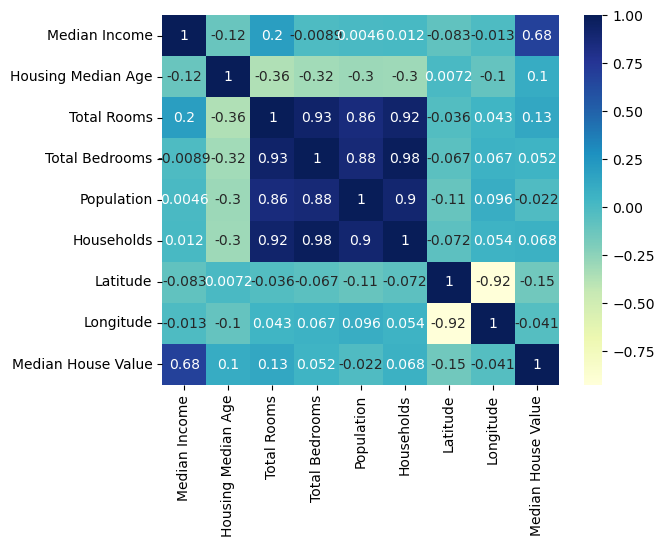

In [12]:
# plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Biểu đồ tương quan giá nhà với tọa độ

<Axes: xlabel='Latitude', ylabel='Longitude'>

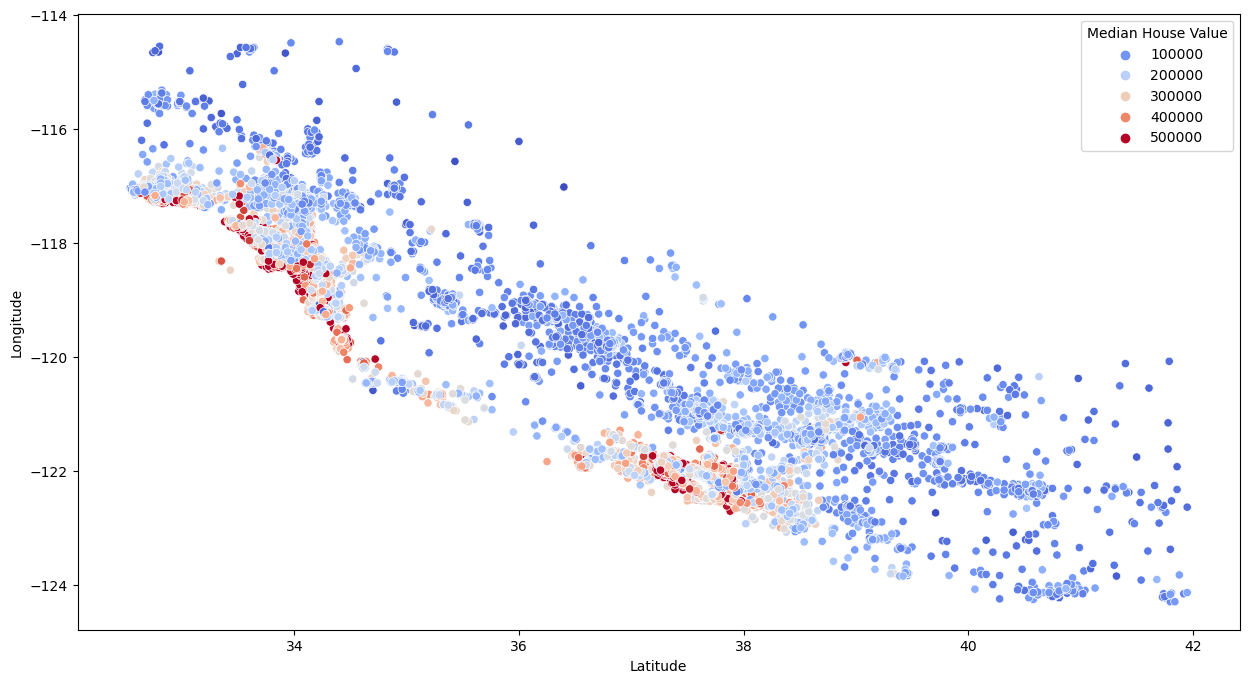

In [13]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Latitude', y='Longitude', data=train_data, hue='Median House Value', palette='coolwarm')

# Hồi quy tuyến tính

In [14]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['Median House Value'], axis=1), train_data['Median House Value']

reg_model = LinearRegression()

reg_model.fit(X_train, y_train)

LinearRegression()

In [16]:
reg_model.score(X_test, y_test)
# kết quả với lần chạy đầu, dữ liệu chưa được chuẩn hóa

0.659824764345319

# Với dữ liệu đã được chuẩn hóa

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

reg_model.fit(X_train_scaler, y_train)

LinearRegression()

In [18]:
reg_model.score(X_test_scaler, y_test)
# kết quả với dữ liệu đã được chuẩn hóa

0.6598247643453188

# Rừng ngẫu nhiên với dữ liệu gốc

In [19]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()

forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
forest_model.score(X_test, y_test)

0.8243382821954222

# Rừng ngẫu nhiên với dữ liệu đã được chuẩn hóa

In [25]:
forest_model.fit(X_train_scaler, y_train)

RandomForestRegressor()

In [31]:
forest_model.score(X_test_scaler, y_test)

0.8268876100753381

# SVR

In [41]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1000000, gamma=0.0001)

svr_model.fit(X_train, y_train)

SVR(C=1000000, gamma=0.0001)

In [33]:
svr_model.score(X_test, y_test)

-0.047645687705810236

# Cây quyết định

In [21]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5)

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [24]:
from sklearn.metrics import mean_squared_error
train_predictions = dt_model.predict(X_train)
test_predictions = dt_model.predict(X_test)

# Đánh giá mô hình sử dụng Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 5271854251.066907
Test MSE: 5482914566.1506195


In [43]:
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

forest_model_pred = forest_model.predict(X_test_scaler)


forest_model_mae = mean_absolute_error(y_test, forest_model_pred)
forest_model_mse = mean_squared_error(y_test, forest_model_pred)
forest_model_r2 = r2_score(y_test, forest_model_pred)
print("MAE : ", forest_model_mae)
print("MSE : ", forest_model_mse)
print("R2 : ", forest_model_r2)

MAE :  31938.256608527132
MSE :  2410361480.2185073
R2 :  0.8235460635343682


In [38]:
pd.DataFrame({'y' : y_test, 'y_pred' : forest_model_pred})

,y,y_pred
9187,329500.0,303660.760067
1681,175400.0,244407.952325
10411,233900.0,258756.778009
9976,303300.0,247985.136614
14295,199100.0,205203.607848
...,...,...
10570,309200.0,303486.501853
17044,457200.0,362303.364683
5240,88700.0,96293.373108
9070,86900.0,81291.519994
